In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import matplotlib as mpl


#axes.xaxis.set_tick_params(direction='in', which='both')
#axes.yaxis.set_tick_params(direction='in', which='both')
mpl.rcParams["xtick.direction"] = "in"
mpl.rcParams["ytick.direction"] = "in"
mpl.rcParams["lines.markeredgecolor"] = "k"
mpl.rcParams["lines.markeredgewidth"] = 0.1
mpl.rcParams["figure.dpi"] = 130
from matplotlib import rc
rc('font', family='serif')
rc('text', usetex=True)
rc('xtick', labelsize='small')
rc('ytick', labelsize='small')
def cm2inch(value):
    return value/2.54

In [4]:
def U_elec(z):
    return B * np.exp(-z / ld)

def U_g(z):
    return z / lb

In [5]:
B = 4 # k_BT unit
ld = 50e-9
lb = 500e-9


In [55]:
z = np.linspace(20e-9, 1e-6, 1000)

In [56]:
Ue = U_elec(z)
Ug = U_g(z)

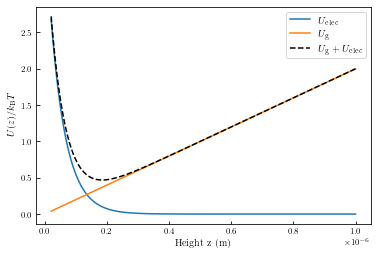

In [57]:
plt.plot(z, Ue, label = "$U_\mathrm{elec}$")
plt.plot(z, Ug, label="$U_\mathrm{g}$")
plt.plot(z, Ug+Ue,"--", color = "k", label="$U_\mathrm{g} + U_\mathrm{elec}$")
plt.xlabel("Height z (m)")
plt.ylabel("$U(z) / k_\mathrm{B}T$")
plt.legend()

In [58]:
def _Peq(z):
    if z <= 0:
        return 0
    else:
        return np.exp(-(B * np.exp(- (z / ld)) + z / lb))

def Peq(z):
    P = np.array([_Peq(zi) for zi in z])
    return P / np.trapz(P, z)

In [59]:
P = Peq(z)

Text(0.5, 0, '$z$ (m)')

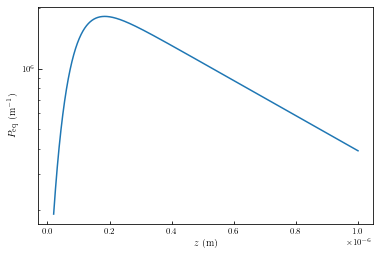

In [63]:
plt.semilogy(z,P)
plt.ylabel("$P_\mathrm{eq} ~ \mathrm{(m^{-1})}$")
plt.xlabel("$z$ (m)")